# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [88]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [89]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [90]:
# deal with missing and inconvenient portions of data 
df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\manju\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


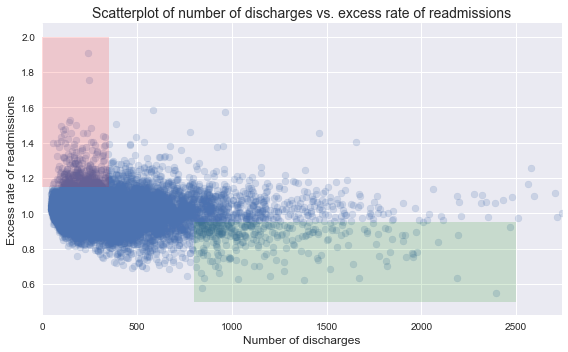

In [91]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])


fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

####  A.) Do you agree with the above analysis and recommendations? Why or why not?

The hospital readmissions report bases its entire analysis from one scatterplot.There is no evidence from statistical analysis to back up its conclusions. The analysis concludes that there is a "significant correlation" between hospital capacity (number of discharges) and readmission rates without any statistical confirmation.
No actual hypothesis test has been done in order to provide recommendations.
There is no clear definition of what is "small". In the statistics section, number of discharges < 100 is treated as small, but in the recommendations section, number of discharges < 300 is considered small. The report can be expanded to include more statistical analysis.


In [92]:

print(hospital_read_df.shape)

(16860, 12)


In [93]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


In [94]:
print(df.shape)

(11497, 12)


####  B.) Provide support for your arguments and your own recommendations with a statistically sound analysis:


In [95]:
df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11497.000000,11497.000000,0.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257571.540141,365.466209,NaN,1.007504,17.984292,17.865695,63.633731
std,154274.374018,308.754590,NaN,0.091964,5.487651,5.240749,59.540296
min,10001.000000,25.000000,NaN,0.549500,2.700000,3.900000,11.000000
25%,110129.000000,160.000000,NaN,0.952600,16.300000,16.600000,24.000000
50%,250042.000000,282.000000,NaN,1.003500,19.000000,19.000000,45.000000
75%,390039.000000,474.000000,NaN,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,NaN,1.909500,32.800000,28.000000,879.000000


In [96]:
df_below100  = df[df['Number of Discharges' ] < 100]
df_above1000 = df[df['Number of Discharges' ] > 1000]

print('Average excess readmission rate < 100:',df_below100['Excess Readmission Ratio'].mean())
print('% with readmission rate greater than 1:',sum(df_below100['Excess Readmission Ratio'] > 1)/len(df_below100) * 100)
print('Average excess readmission rate > 1000:',df_above1000['Excess Readmission Ratio'].mean())
print('% with readmission rate greater than 1:',sum(df_above1000['Excess Readmission Ratio'] > 1)/len(df_above1000) * 100)

# clean up NaN values in 'Excess Readmission Ratio' column
clean_hospital_read_df = df[np.isfinite(df['Excess Readmission Ratio'])]



Average excess readmission rate < 100: 1.0226183501683508
% with readmission rate greater than 1: 63.215488215488215
Average excess readmission rate > 1000: 0.978335421166307
% with readmission rate greater than 1: 44.49244060475162


####      1.) Setup an appropriate hypothesis test.

$H$o: There is no significant correlation between hospital capacity (number of discharges) and readmission rates.   
$H$a: There is a significant correlation between hospital capacity (number of discharges) and readmission rates.

In [98]:
corr_r = df['Number of Discharges'].corr(df['Excess Readmission Ratio'])
print('correlation between Number of discharges and Readmission ration:',corr_r,'(negative correlation) and is small, close to 0.0')

correlation between Number of discharges and Readmission ration: -0.09739794351079355 (negative correlation) and is small, close to 0.0


In [100]:
# using bootstrapping

df_r_finite = df[np.isfinite(df['Excess Readmission Ratio'])]
no_of_disc = df_r_finite['Number of Discharges']
read_ratio = df_r_finite['Excess Readmission Ratio']
perm_reps = np.empty(10000)
for i in range(10000):
    perms = np.random.permutation(no_of_disc)
    perm_reps[i] = np.corrcoef(perms,read_ratio)[0,1]
p = np.sum(perm_reps <= corr_r)/10000
print('p value:',p)

p value: 0.0


####     2.) Compute and report the observed significance value (or p-value).

C:\Users\manju\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\manju\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


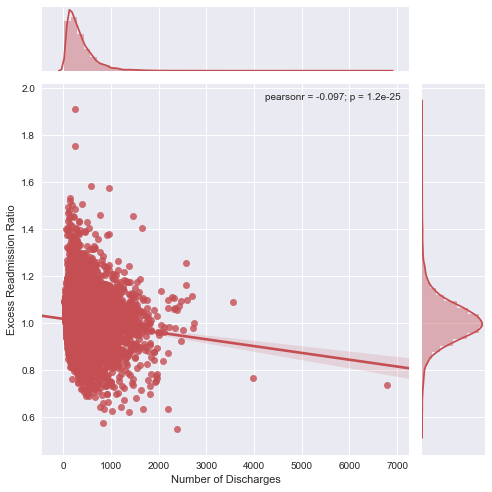

In [97]:
# scatterplot, correlation coefficient, p-value

sns.set(style="darkgrid", color_codes=True)
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=clean_hospital_read_df,
              kind='reg', color='r', size=7)
plt.show()

####  3.) Report statistical significance for  αα  = .01. 

Since p-value = 1.2e-25 < 0.01, the statistical significance is the same as when α = .05.

There is a statistical significance correlation but with a negative correlation between number of admissions and readmission ratio.

####  4.)  Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statistically, the analysis shows that there is a significant relation  between the number of discharges and the excess readmission ratio, therefore the $H$o can be rejected.But since correlation coefficient is so close to zero,it cannot be said that  there is a strong correlation between the two. 
So practically speaking, there is a weak relationship between the number of discharges and the excess readmission ratio. So even though there is statistical significance, there is not much practical significance.

Because of this lack of practical significance, I would not recommend that smaller hospitals should be required to demonstrate upgraded resource allocation for quality care to continue operation. 

####  5.) Look at the scatterplot above.
What are the advantages and disadvantages of using this plot to convey information?
Construct another plot that conveys the same information in a more direct manner

The plot above does  indicate a relationship. However, it is hard to predict  with this plot alone .
. If the plot included a line which showed the value of the negative correlation, it would more clearly present the relationship of the data. The second scatter plot above with the  line showing the negative correlation is a better alternative in this case